In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import plotly.express as px
sb.set() # set the default Seaborn style for graphics

In [2]:
listing = pd.read_csv("listings.csv")
calendar = pd.read_csv("calendar.csv")
reviews = pd.read_csv("reviews.csv")
rating = pd.DataFrame(listing["review_scores_rating"])

In [3]:
reqData = ['price', 'name', 'longitude', 'latitude', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_value', 'review_scores_location', 'number_of_reviews', 'host_response_time','host_response_rate']
# listingsCleaned = listing[(listing.review_scores_rating > 84) & (listing.number_of_reviews > 30)]
listingLess = listing[reqData]


# Removed below 80 reviews as they are mostly outliers and also to allow for less clutter in the visualization
ldf = listingLess[(listingLess.review_scores_rating >= 80) & (listingLess.number_of_reviews >= 30)]

p = ldf['price'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float)
hrr = ldf['host_response_rate'].replace( '[\%,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float)

# p = ldf['price'].str.replace('$','')
# hrr = ldf['host_response_rate'].replace( '\D+','', regex=True ).astype(float)

# wellRatedListings['price'] = wellRatedListings['price'][1:]
# ldf = pd.concat([wellRatedListings])
# print(p)
ldf['price'] = p
ldf['host_response_rate'] = hrr 
print(ldf)

mapStyleOSM = "open-street-map"
mapStyleL = "light"
mapStyleD = "dark"

colors = ["royalblue","crimson","lightseagreen","orange","fuchsia"]


price                                 name   longitude   latitude  \
0      85.0         Stylish Queen Anne Apartment -122.371025  47.636289   
1     150.0   Bright & Airy Queen Anne Apartment -122.365667  47.639123   
4     450.0       Charming craftsman 3 bdm house -122.372471  47.632918   
6      80.0      Queen Anne Private Bed and Bath -122.368519  47.636605   
7      60.0    Tiny Garden cabin on Queen Anne   -122.375856  47.640161   
...     ...                                  ...         ...        ...   
3790  175.0   Your own 2 Bedroom home in Fremont -122.347817  47.649271   
3793  109.0   Seattle Urban-Chic Studio Cottage  -122.357683  47.660056   
3796   85.0      Charming Fremont Garden Cottage -122.360571  47.656508   
3798   77.0   Everything Seattle in 0-3 miles, A -122.343205  47.655381   
3812   95.0  OF THE TREE & CLOUDS. KID FRIENDLY! -122.358124  47.654516   

      review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                     95

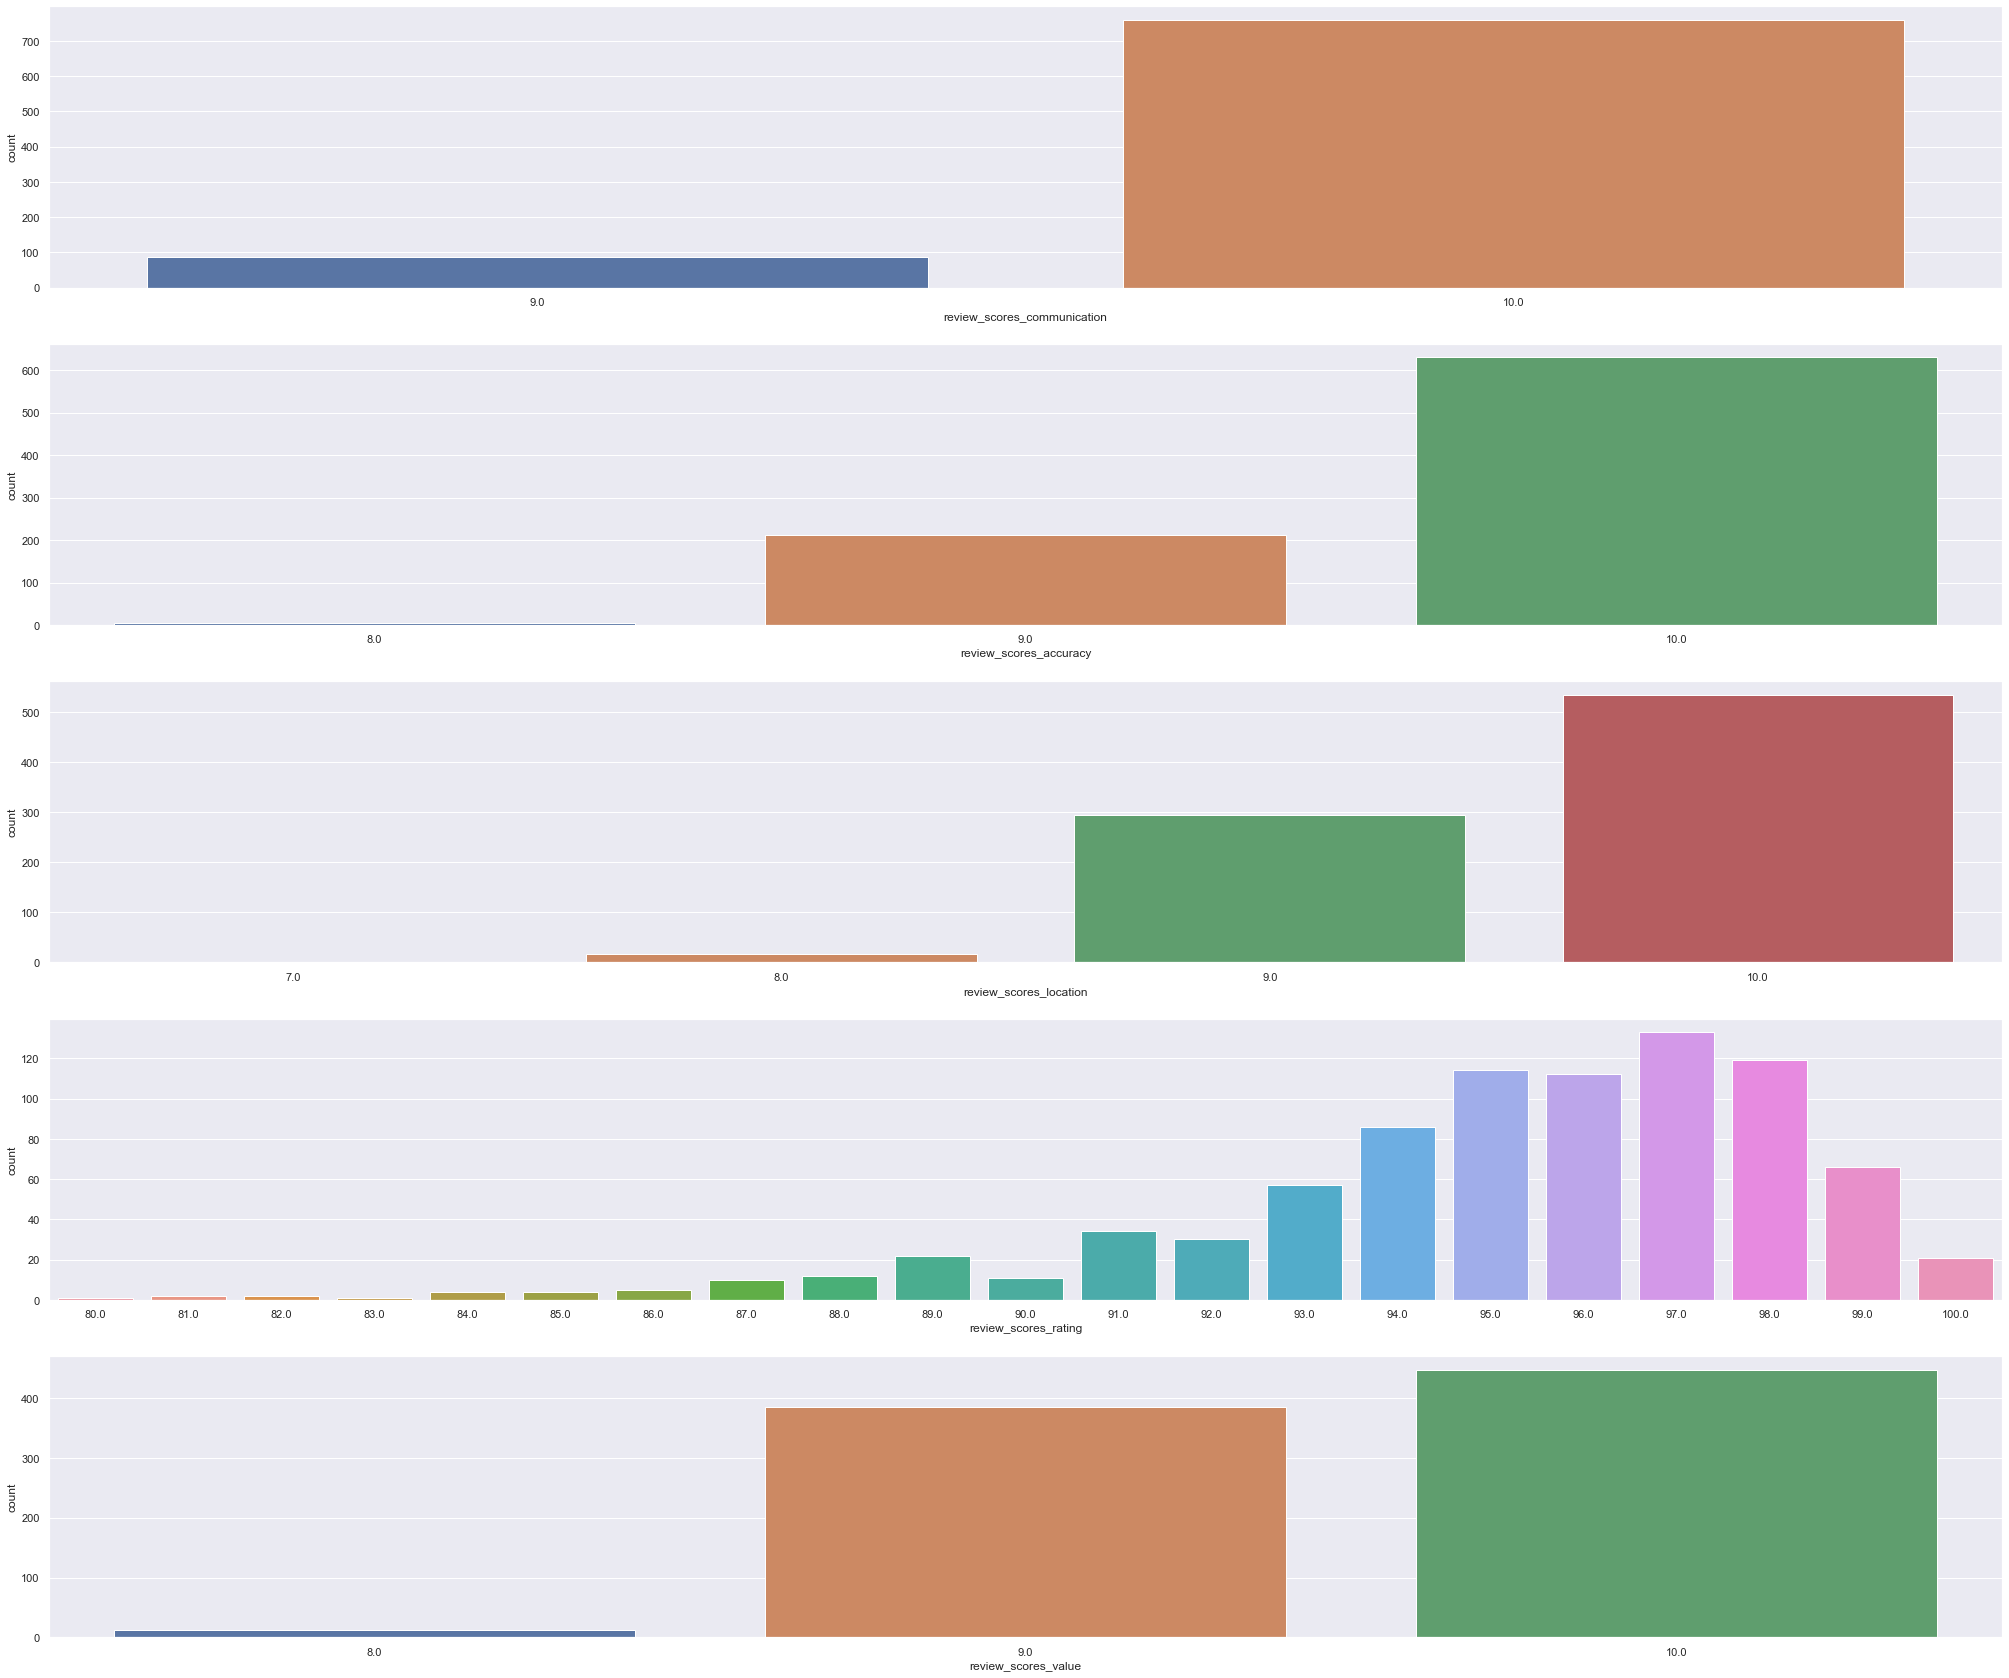

In [4]:
f, axes = plt.subplots(5, 1, figsize=(35, 30))
sb.countplot(x = "review_scores_communication", data = ldf, orient = "h", ax = axes[0])
sb.countplot(x = "review_scores_accuracy", data = ldf, orient = "h", ax = axes[1])
sb.countplot(x = "review_scores_location", data = ldf, orient = "h", ax = axes[2])
sb.countplot(x = "review_scores_rating", data = ldf, orient = "h", ax = axes[3])
sb.countplot(x = "review_scores_value", data = ldf, orient = "h", ax = axes[4])


In [5]:
import plotly.graph_objects as go
token = "pk.eyJ1IjoicmFuZG9tYW5kbyIsImEiOiJjazhvaHZkNnYwMWozM2xwYWk1d2dsdXVhIn0.oOoOYk94pLXAbWI3KERHLQ"
cldf = ldf.copy()

Qs = [.25, .5, .75, 1]
def label(row, **kwargs):
    if row[kwargs['col']] <= cQs[0]:
        val = kwargs['vals'][0]
    elif (cQs[1] >= row[kwargs['col']]) & (row[kwargs['col']] > cQs[0]):
        val = kwargs['vals'][1]
    elif (cQs[2] >= row[kwargs['col']]) & (row[kwargs['col']] > cQs[1]):
        val = kwargs['vals'][2]
    else:
        val = kwargs['vals'][3]
    return val

def label2(row, **kwargs):
    if row[kwargs['col']] == kwargs['quant']:
        val = kwargs['vals'][0]
    else:
        val = kwargs['vals'][1]
    return val

cQs = []
for j in range(len(Qs)):
    cQs.append(cldf['price'].quantile(Qs[j]))
print(cQs)
cldf['feat0'] = cldf.apply(label, col='price', vals=['very cheap', 'affordable', 'pricey', 'high-end'], axis=1)

cQs = []
for j in range(len(Qs)):
    cQs.append(cldf['review_scores_rating'].quantile(Qs[j]))
cldf['feat1'] = cldf.apply(label, col='review_scores_rating', vals=['poor review', 'lower than average review', 'higher than average review', 'best review'], axis=1)
cldf['feat2'] = cldf.apply(label2, col='host_response_rate', vals=['very responsive', ''], quant=100, axis=1)
cldf['feat3'] = cldf.apply(label2, col='review_scores_cleanliness', vals=['very clean', ''], quant=10, axis=1)
cldf['feat4'] = cldf.apply(label2, col='review_scores_location', vals=['good location', ''], quant=10, axis=1)
cldf['feat5'] = cldf.apply(label2, col='review_scores_value', vals=['good value', ''], quant=10, axis=1)
cldf['feat6'] = cldf.apply(label2, col='review_scores_accuracy', vals=['accurate listing', ''], quant=10, axis=1)


# pd.set_option('display.max_rows', cldf.shape[0]+1)
# print(cldf['feat0'])
# print(cldf['feat1'])
# print(cldf['feat2'])
# print(cldf['feat3'])
# print(cldf['feat4'])

[70.0, 95.0, 125.0, 999.0]


In [6]:
fig = go.Figure()
limits = [(80,85),(86,90),(91,95),(96,100)]
for i in range(len(limits)):
    lim = limits[i]
    cat_df = cldf[(cldf.review_scores_rating >= lim[0]) & (cldf.review_scores_rating <= lim[1])]
    
    fig.add_trace(dict(
        type = "scattermapbox",
        lon = cat_df['longitude'],
        lat = cat_df['latitude'],
        text = cat_df['name'] + " - $" + cat_df['price'].astype(str) + "</br>" + \
         cat_df['review_scores_rating'].astype(str) + " Review Rating",
        marker = dict(
            size = cat_df['review_scores_rating']/8,
            color = colors[i],
            opacity = .8,
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])
        )
    )
    


fig.update_layout(
    mapbox={
        "accesstoken": token, 
        "style": mapStyleL,
        "zoom": 10,
        "center":dict(
                lat=cldf['latitude'][0],
                lon=cldf['longitude'][0]
            ),
    },
    title_text = 'Airbnb review score ratings in categories',
    showlegend = True,
    geo = dict(
        scope = 'usa',
        landcolor = 'rgb(217, 217, 217)',
    ),
    height = 800,
    
)
fig.show()

In [7]:
fig = go.Figure()
limits = [8,9,10]

for i in range(len(limits)):
    lim = limits[i]
    cat_df = cldf[(cldf.review_scores_location == lim)]
    
    fig.add_trace(dict(
        type = "scattermapbox",
        lon = cat_df['longitude'],
        lat = cat_df['latitude'],
        text = cat_df['name'] + " - $" + cat_df['price'].astype(str) + "</br>" + \
         cat_df['review_scores_rating'].astype(str) + " Review Rating",
        marker = dict(
            size = np.sqrt(cat_df['price']),
            color = colors[i],
            opacity = 0.85,
        ),
        name = '{0}'.format(lim)
        )
    )
    

    

fig.update_layout(
    mapbox={
        "accesstoken": token, 
        "style": "light",
        "zoom": 10,
        "center":dict(
                lat=cldf['latitude'][0],
                lon=cldf['longitude'][0]
            ),
    },
    title_text = 'Airbnb grouped location review scores',
    showlegend = True,
    geo = dict(
        scope = 'usa',
        landcolor = 'rgb(217, 217, 217)',
    ),
    height = 800,
    
)
fig.show()

In [8]:
fig = go.Figure()
limits = [(0,50),(51,100),(101,200),(201,1000)]
# limits = [(0,65),(66,120),(121,190),(191,300),(301,600)]

for i in range(len(limits)):
    lim = limits[i]
    cat_df = cldf[(cldf.price >= lim[0]) & (cldf.price <= lim[1])]
    
    fig.add_trace(dict(
        type = "scattermapbox",
        lon = cat_df['longitude'],
        lat = cat_df['latitude'],
        text = cat_df['name'] + " - $" + cat_df['price'].astype(str) + "</br>" + \
         cat_df['review_scores_rating'].astype(str) + " Review Rating",
        marker = dict(
            size = np.sqrt(cat_df['price']),
            color = colors[i],
            opacity = .9,
        ),
        name = '${0} - {1}'.format(lim[0],lim[1])
        )
    )
    

    

fig.update_layout(
    mapbox={
        "accesstoken": token, 
        "style": mapStyleL,
        "zoom": 10,
        "center":dict(
                lat=cldf['latitude'][0],
                lon=cldf['longitude'][0]
            ),
    },
    title_text = 'Airbnb grouped listing prices',
    showlegend = True,
    geo = dict(
        scope = 'usa',
        landcolor = 'rgb(217, 217, 217)',
    ),
    height = 800,
    
)
fig.show()

In [11]:
fig = go.Figure()
# limits = [(0,50),(51,100),(101,200),(201,1000)]
# limits = [(0,65),(66,120),(121,190),(191,300),(301,600)]  

limits = [0]
for j in range(len(Qs)):
    limits.append(cldf['price'].quantile(Qs[j]))
# print(limits)

x = ['very cheap', 'affordable', 'pricey', 'high-end']
for i in range(len(x)):
    # lim = limits[i]
    cat_df = cldf[(cldf.feat0 == x[i])]
    
    fig.add_trace(dict(
        type = "scattermapbox",
        lon = cat_df['longitude'],
        lat = cat_df['latitude'],
        text = cat_df['name'] + " - $" + cat_df['price'].astype(str) + "</br>Review Rating: " + \
        cat_df['review_scores_rating'].astype(str) + "</br>Tags:</br>" + \
        cat_df['feat0'] + "</br>" + cat_df['feat1'] + "</br>" + cat_df['feat2'] + "</br>" + cat_df['feat3'] + "</br>" +\
        cat_df['feat4'] + "</br>" + cat_df['feat5'] + "</br>" + cat_df['feat6'],
        # text = "{0} - ${1}</br>Review Rating: {2}</br>Tags:{3} | {4} | {5} | {6} |".format(cat_df['name'], cat_df['price'].astype(str), cat_df['review_scores_rating'].astype(str), cat_df['feat0'], cat_df['feat1'], cat_df['feat2'], cat_df['feat3']),
        marker = dict(
            size = 11,
            color = colors[i],
            opacity = .9,
        ),
        name = '${0} - {1}'.format(limits[i],limits[i+1])
        )
    )
    

fig.update_layout(
    mapbox={
        "accesstoken": token, 
        "style": mapStyleL,
        "zoom": 10,
        "center":dict(
                lat=cldf['latitude'][0],
                lon=cldf['longitude'][0]
            ),
    },
    title_text = 'Airbnb grouped listing prices',
    showlegend = True,
    geo = dict(
        scope = 'usa',
        landcolor = 'rgb(217, 217, 217)',
    ),
    height = 900,
    width = 1000,
    
)
fig.show()